In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem

Euler discovered the remarkable quadratic formula:

$$n^2+n+41$$

It turns out that the formula will produce 40 primes for the consecutive integer values $0≤n≤39$. However, when $n=40,402+40+41=40(40+1)+41$ is divisible by 41, and certainly when $n=41,412+41+41$ is clearly divisible by 41.

The incredible formula $n^2−79n+1601$ was discovered, which produces 80 primes for the consecutive values 0≤n≤79. The product of the coefficients, −79 and 1601, is −126479.

Considering quadratics of the form:

$n^2+an+b$, where |a|<1000 and |b|≤1000

where |n| is the modulus/absolute value of n
e.g. |11|=11 and |−4|=4
Find the product of the coefficients, a and b, for the quadratic expression that produces the maximum number of primes for consecutive values of n, starting with n=0.

# Prime sieve

**Algorithm (Prime sieve):** Given a positive integer $n$, this algorithm computes a list of primes up to $n$.

1. [Initialize] Let $X = [3,5,\ldots]$ be the list of all odd integers between 3 and $n$. Let $P=[2]$ be the list of primes found so far.
2. [Finished?] Let $p$ be the first element of $X$. If $p > \sqrt{n}$, append each element of $X$ to $P$ and terminate. Otherwise append $p$ to $P$.
3. [Cross Off] Set $X$ equal to the sublist of elements in $X$ that are not divisble by $p$. Go to step 2.

*Source: Elementary Number Theory: Primes, Congruences, and Secrets, page 12, Algorithm 1.2.3 (https://wstein.org/ent/ent.pdf)*

**Euclidean algorithm (GCD)**

In [2]:
import math

# Find the greatest common divisor for a, b. (Euclidean algorithm)
# src: https://wstein.org/ent/ent.pdf
def gcd(a,b):
    a = abs(a)
    b = abs(b)
    if a == b: return a
    if b > a:
        swap = a
        a = b
        b = swap
    q = a // b
    r = a - b * q
    while r != 0:
        a = b
        b = r
        q = a // b
        r = a - b * q
    return b

**Prime sieve (ENT/GCD)**

Implemented exactly as specified by the algorithm. It uses the GCD to determine if it is divisble.

In [3]:
def sieve_gcd(N):
    sqrtN = math.sqrt(N)
    X = [x for x in range(3, N, 2)]
    P = [2]
    p=0
    while p < sqrtN:
        p = X[0]
        P.append(p)
        X = [x for x in X if gcd(x,p)!=p]
    return P + X

In [4]:
%%time
N = 100000
P = sieve_gcd(N)
print('Number of primes found: {} (N={})'.format(len(P), N))

Number of primes found: 9592 (N=100000)
Wall time: 754 ms


**Prime sieve (ENT/MOD)**

Using the modulo for division testing.

In [6]:
def sieve_mod(N):
    sqrtN = math.sqrt(N)
    X = [x for x in range(3, N, 2)]
    P = [2]
    p=0
    while p < sqrtN:
        p = X[0]
        P.append(p)
        X = [x for x in X if x % p != 0]
    return P + X

In [7]:
%%time
N = 100000
P = sieve_mod(N)
print('Number of primes found: {} (N={})'.format(len(P), N))

Number of primes found: 9592 (N=100000)
Wall time: 51 ms


In [8]:
P

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


Gives a substantial improvement.

**Prime sieve (List/All)**

The idea is to put all the numbers in a list, and cross off all the multiples of primes for $i < \sqrt{N}$. 

I suspect it also gives a huge boost to look-ups, since now we can just access $P[i]$, instead of searching in a list of primes to see if it is the list.

In [3]:
import math

In [4]:
def sieve_lall(N):
    sqrtN = math.sqrt(N)
    L = [True] * N
    L[0]=L[1]=False
    for i in range(math.floor(sqrtN)+1):
        if not L[i]: continue
        for j in range(2, N//i+1):
            if i*j >= N: continue
            L[i*j] = False
    return L

In [5]:
sieve_lall(10)

[False, False, True, True, False, True, False, True, False, False]

In [8]:
N=10
S=sieve_lall(N)
for i in range(N):
    print('{} is {}'.format(i, 'prime' if S[i] else 'composite' ))

0 is composite
1 is composite
2 is prime
3 is prime
4 is composite
5 is prime
6 is composite
7 is prime
8 is composite
9 is composite


In [9]:
N=25
print('Sieve List/All: {}'.format(len( [1 for x in sieve_lall(N) if x] )))
print('Sieve ENP/Mod: {}'.format(len( sieve_mod(N) )))

Sieve List/All: 9
Sieve ENP/Mod: 9


In [10]:
S = sieve_lall(N)
[x for x in range(len(S)) if S[x]]

[2, 3, 5, 7, 11, 13, 17, 19, 23]

In [11]:
sieve_mod(N)

[2, 3, 5, 7, 11, 13, 17, 19, 23]

# Analysis

## Generation time as $N$ grows

A plot showing the time to generate $N$ primes of each of the different implementations of the algorithm.

In [12]:
import pandas as pd
import time

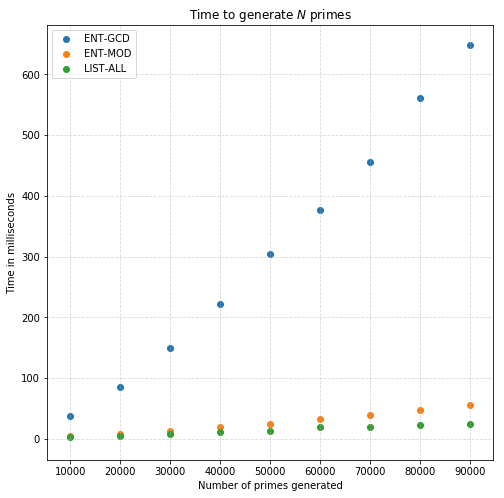

Wall time: 3.64 s


In [13]:
%%time

plt.figure(figsize=(8,8))

for label, f in [('GCD', sieve_gcd), ('MOD', sieve_mod), ('LIST-ALL', sieve_lall)]:
    
    samples = []
    
    for n in range(10000, 100000, 10000):
        start_time = time.time()
        P = f(n)
        elapsed_time = time.time() - start_time
        samples.append((n, elapsed_time*1000))
        
    x, y = zip(*samples)
    plt.scatter(x, y)
    
plt.title('Time to generate $N$ primes')
plt.xlabel('Number of primes generated')
plt.ylabel('Time in milliseconds')
plt.grid(alpha=.5,ls='dashed')
plt.legend(['ENT-GCD', 'ENT-MOD', 'LIST-ALL'])

plt.show()

## Read time as $N$ grows

We want to plot reading time vs. number of primes in the list $N$. For each $N$ we test $R$ reads randomly generated lookups between $[1,N]$.

In [14]:
import random

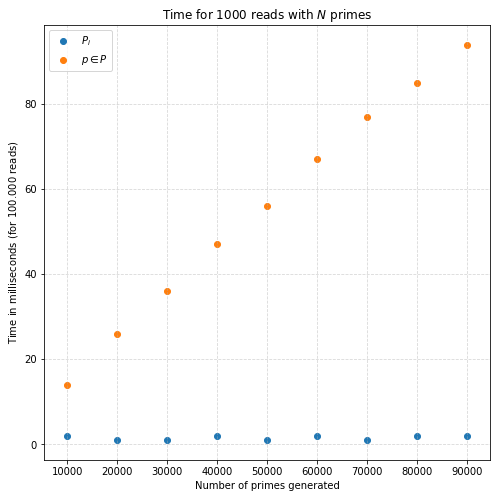

Wall time: 1.1 s


In [15]:
%%time
R=1000
a=10000
b=100000
step=10000
primes_found = 0
samples = []

plt.figure(figsize=(8,8))
for n in range(a, b, step):
    sieve = sieve_lall(n)
    
    start_time = time.time()
    
    for _ in range(R):
        r = random.randint(1, n-2)
        if sieve[r]:
            primes_found += 1
            
    elapsed_time = time.time() - start_time
    samples.append((n, elapsed_time*1000))

x, y = zip(*samples)
plt.scatter(x, y)

primes_found = 0
samples = []

for n in range(a, b, step):
    sieve = sieve_mod(n)
    
    start_time = time.time()
    
    for _ in range(R):
        r = random.randint(1, n)
        if r in sieve:
            primes_found += 1
            
    elapsed_time = time.time() - start_time
    samples.append((n, elapsed_time*1000))

x, y = zip(*samples)
plt.scatter(x, y)

plt.title('Time for ${}$ reads with $N$ primes'.format(R))
plt.xlabel('Number of primes generated')
plt.ylabel('Time in milliseconds (for $100.000$ reads)')
plt.grid(alpha=.5,ls='dashed')
plt.legend(['$P_i$', '$p\in P$'])

plt.show()

The list where we can simply look-up $P_i$ is clearly the fastest.

## Disassembly

In [16]:
import dis

In [17]:
dis.dis(sieve_gcd)

  2           0 LOAD_GLOBAL              0 (math)
              2 LOAD_ATTR                1 (sqrt)
              4 LOAD_FAST                0 (N)
              6 CALL_FUNCTION            1
              8 STORE_FAST               1 (sqrtN)

  3          10 LOAD_CONST               1 (<code object <listcomp> at 0x000001F115AC1270, file "<ipython-input-3-39c45824a653>", line 3>)
             12 LOAD_CONST               2 ('sieve_gcd.<locals>.<listcomp>')
             14 MAKE_FUNCTION            0
             16 LOAD_GLOBAL              2 (range)
             18 LOAD_CONST               3 (3)
             20 LOAD_FAST                0 (N)
             22 LOAD_CONST               4 (2)
             24 CALL_FUNCTION            3
             26 GET_ITER
             28 CALL_FUNCTION            1
             30 STORE_FAST               2 (X)

  4          32 LOAD_CONST               4 (2)
             34 BUILD_LIST               1
             36 STORE_FAST               3 (P)

  5       

In [18]:
dis.dis(sieve_mod)

  2           0 LOAD_GLOBAL              0 (math)
              2 LOAD_ATTR                1 (sqrt)
              4 LOAD_FAST                0 (N)
              6 CALL_FUNCTION            1
              8 STORE_FAST               1 (sqrtN)

  3          10 LOAD_CONST               1 (<code object <listcomp> at 0x000001F1280E0030, file "<ipython-input-5-9c237f948a42>", line 3>)
             12 LOAD_CONST               2 ('sieve_mod.<locals>.<listcomp>')
             14 MAKE_FUNCTION            0
             16 LOAD_GLOBAL              2 (range)
             18 LOAD_CONST               3 (3)
             20 LOAD_FAST                0 (N)
             22 LOAD_CONST               4 (2)
             24 CALL_FUNCTION            3
             26 GET_ITER
             28 CALL_FUNCTION            1
             30 STORE_FAST               2 (X)

  4          32 LOAD_CONST               4 (2)
             34 BUILD_LIST               1
             36 STORE_FAST               3 (P)

  5       

In [19]:
dis.dis(sieve_lall)

  2           0 LOAD_GLOBAL              0 (math)
              2 LOAD_ATTR                1 (sqrt)
              4 LOAD_FAST                0 (N)
              6 CALL_FUNCTION            1
              8 STORE_FAST               1 (sqrtN)

  3          10 LOAD_CONST               1 (True)
             12 BUILD_LIST               1
             14 LOAD_FAST                0 (N)
             16 BINARY_MULTIPLY
             18 STORE_FAST               2 (L)

  4          20 LOAD_CONST               2 (False)
             22 DUP_TOP
             24 LOAD_FAST                2 (L)
             26 LOAD_CONST               3 (0)
             28 STORE_SUBSCR
             30 LOAD_FAST                2 (L)
             32 LOAD_CONST               4 (1)
             34 STORE_SUBSCR

  5          36 SETUP_LOOP              90 (to 128)
             38 LOAD_GLOBAL              2 (range)
             40 LOAD_GLOBAL              0 (math)
             42 LOAD_ATTR                3 (floor)
            

To find the maximum size of the sieve, we plug the upper limits into the quadratic.

In [33]:
250**2+1000*250+1001

313501

In [47]:
%%time
sieve=sieve_lall(313501)
max_a=max_b=max_n=0
for a in range(-1000, 1000):
    for b in [x for x in sieve[]]range(-1001, 1001):
        if not sieve[b]: continue
        if not sieve[a+b+1]: continue
        n=0
        for n in range(80):
            p = n**2+a*n+b
            if p != int(p) or not sieve[p]:
                if n > max_n:
                    max_n=n;max_a=a;max_b=b;
                break

print('a: {}, b: {}, n: {}'.format(max_a,max_b,max_n))

a: -61, b: 971, n: 71
Wall time: 662 ms
